Part 1: Meet the data Data description – This data includes four columns/random variables: the daily ETF return; the daily relative change in the price of the crude oil; the daily relative change in the gold price; and the daily return of the JPMorgan Chase & Co stock. The sample size is 1000. Requirements – Use any software to obtain the sample mean and sample standard deviation for each random variable (column) of the data; the sample correlations among each pair of the four random variables (columns) of the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from scipy.stats.stats import pearsonr
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import ttest_ind
import scipy
import scipy.stats as stats
import scipy.stats as st
from numpy import sum as arraysum
from numpy import sqrt
from scipy.stats import linregress
from scipy.stats import sem
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from statsmodels.stats import diagnostic as diag
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pylab



In [2]:
data= pd.read_excel('data.xlsx')

In [3]:
ETF=data.Close_ETF

oil=data.oil

gold=data.gold

JPM=data.JPM

In [136]:
#mean of all the columns
np.mean(data)

Close_ETF    121.152960
oil            0.001030
gold           0.000663
JPM            0.000530
dtype: float64

In [137]:
#std of all the columns
np.std(data)

Close_ETF    12.563504
oil           0.021082
gold          0.011283
JPM           0.011011
dtype: float64

In [138]:
#correlation between all the columns
data.corr()

,Close_ETF,oil,gold,JPM
Close_ETF,1.000000,-0.009045,0.022996,0.036807
oil,-0.009045,1.000000,0.235650,-0.120849
gold,0.022996,0.235650,1.000000,0.100170
JPM,0.036807,-0.120849,0.100170,1.000000


Part 2: Describe your dataRequirements–Use any softwareto draw the following plots:1)A histogram for each column (hint: four histograms total)2)A time series plot for each column (hint: use the series “1, 2, 3, ..., 1000” as the horizontal axis; four plots total)3)A time series plot for allfour columns (hint: one plot including four “curves”and each “curve” describes one column)4)Three scatter plots to describe the relationships between the ETF column and the OIL column; between the ETF column and the GOLD column; between the ETF column and the JPM column, respectively

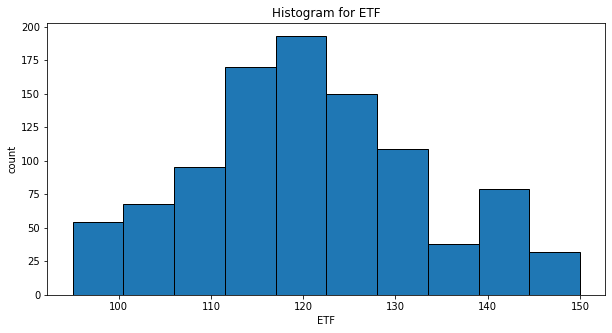

In [139]:
#Part 2 1st subpoint
#Histogram for ETF coloumn
plt.figure(figsize = (10,5))
plt.title("Histogram for ETF")
plt.xlabel("ETF")
plt.ylabel("count")
plt.hist(data['Close_ETF'], bins = 10, edgecolor='black',range = (95,150))
plt.show()

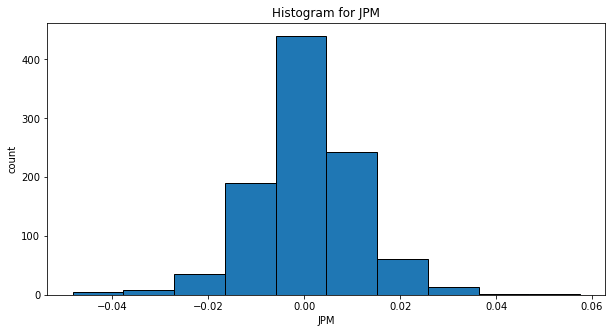

In [140]:
#Part 2 1st subpoint
#Histogram for JPM coloumn
plt.figure(figsize = (10,5))
plt.title("Histogram for JPM")
plt.xlabel("JPM")
plt.ylabel("count")
plt.hist(data['JPM'],edgecolor='black')
plt.show()

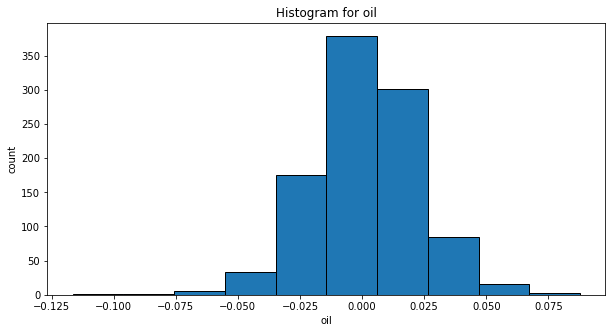

In [141]:
#Part 2 1st subpoint
#Histogram for JPM coloumn
plt.figure(figsize = (10,5))
plt.title("Histogram for oil")
plt.xlabel("oil")
plt.ylabel("count")
plt.hist(data['oil'],edgecolor='black')
plt.show()

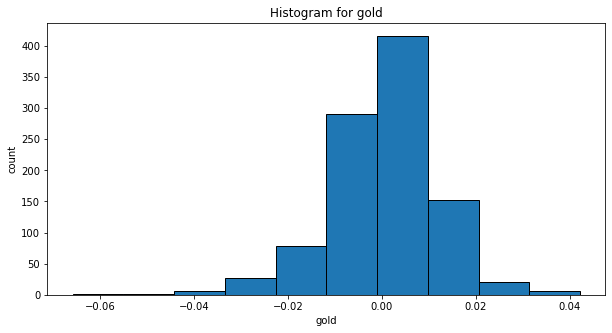

In [142]:
#Part 2 1st subpoint
#Histogram for JPM coloumn
plt.figure(figsize = (10,5))
plt.title("Histogram for gold")
plt.xlabel("gold")
plt.ylabel("count")
plt.hist(data['gold'],edgecolor='black')
plt.show()

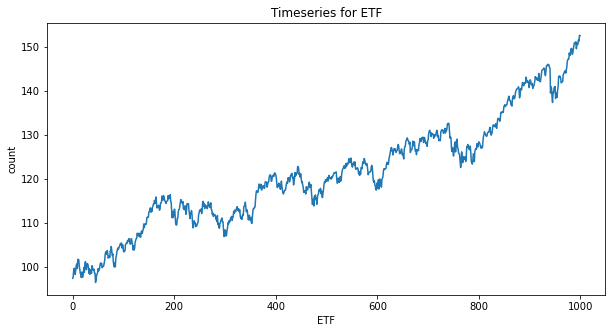

In [143]:
#Part 2 2nd subpoint
#Timeseries for JPM coloumn
close_etf = pd.Series(data['Close_ETF'])
plt.figure(figsize = (10,5))
plt.title("Timeseries for ETF")
plt.xlabel("ETF")
plt.ylabel("count")
close_etf.plot()
plt.show()

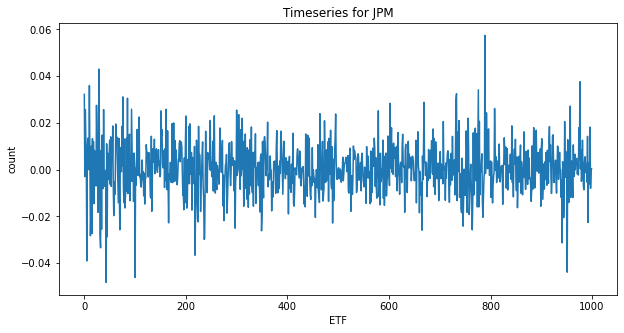

In [144]:
#Part 2 2nd subpoint
#Timeseries for JPM coloumn
close_etf = pd.Series(data['JPM'])
plt.figure(figsize = (10,5))
plt.title("Timeseries for JPM")
plt.xlabel("ETF")
plt.ylabel("count")
JPM = pd.Series(data['JPM'])
JPM.plot()
plt.show()

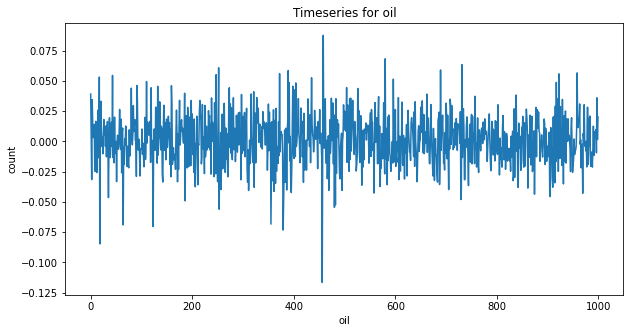

In [145]:
#Part 2 2nd subpoint
#Timeseries for JPM coloumn
close_etf = pd.Series(data['oil'])
plt.figure(figsize = (10,5))
plt.title("Timeseries for oil")
plt.xlabel("oil")
plt.ylabel("count")
JPM = pd.Series(data['oil'])
JPM.plot()
plt.show()

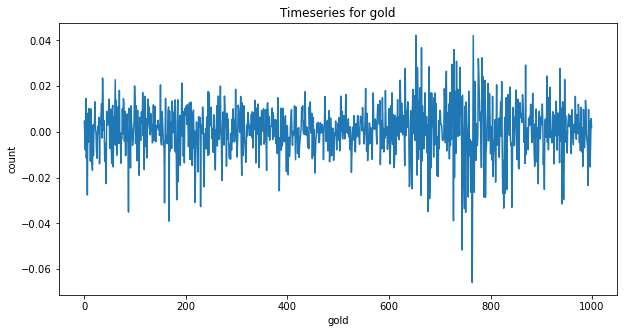

In [146]:
#Part 2 2nd subpoint
#Timeseries for JPM coloumn
close_etf = pd.Series(data['gold'])
plt.figure(figsize = (10,5))
plt.title("Timeseries for gold")
plt.xlabel("gold")
plt.ylabel("count")
JPM = pd.Series(data['gold'])
JPM.plot()
plt.show()

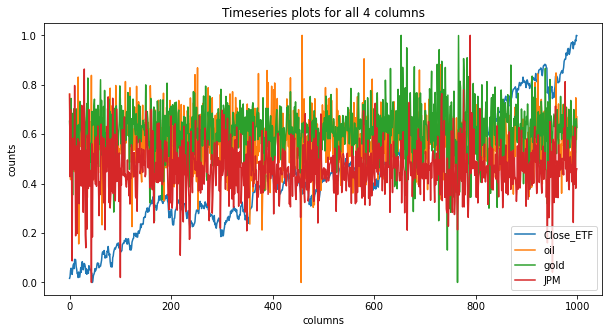

In [147]:
#Part 2 3rd subpoint
#Timeseries for all 4 columns

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(x_scaled)
plt.figure(figsize = (10,5))
plt.plot(data)
plt.title("Timeseries plots for all 4 columns")
plt.xlabel("columns")
plt.ylabel("counts")
plt.legend(['Close_ETF','oil','gold','JPM'],loc='lower right')
plt.show()

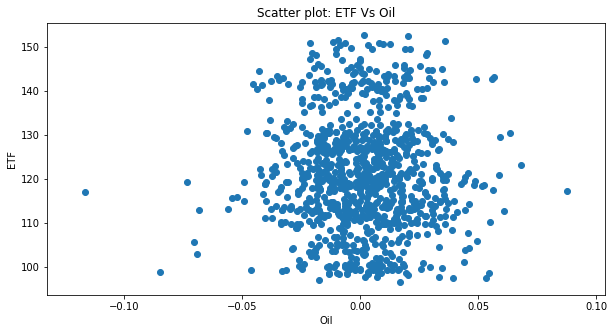

In [4]:
#Part 2 4th subpoint
#Scatter plot : ETF vs Oil
plt.figure(figsize = (10,5))
plt.scatter(oil, ETF)
plt.xlabel('Oil')
plt.ylabel('ETF')
plt.title('Scatter plot: ETF Vs Oil')
plt.show()

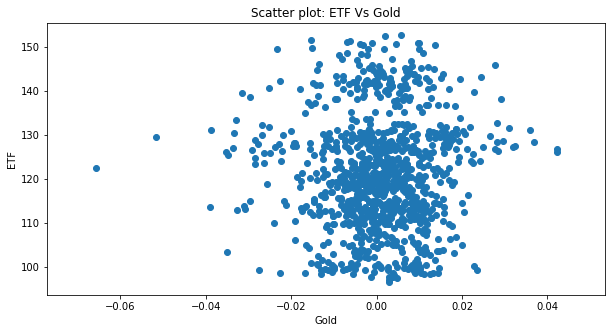

In [5]:
#Part 2 4th subpoint
#Scatter plot : ETF vs Gold
plt.figure(figsize = (10,5))
plt.scatter(gold,ETF)
plt.xlabel('Gold')
plt.ylabel('ETF')
plt.title('Scatter plot: ETF Vs Gold')
plt.show()

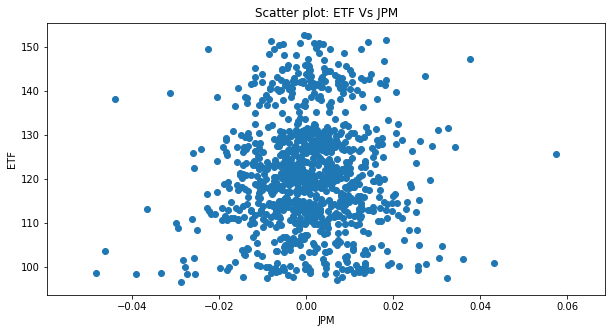

In [6]:
#Part 2 4th subpoint
#Scatter plot : ETF vs JPM
plt.figure(figsize = (10,5))
plt.scatter(JPM,ETF)
plt.xlabel('JPM')
plt.ylabel('ETF')
plt.title('Scatter plot: ETF Vs JPM')
plt.show()

Part 3: What distribution does your data follow

Requirements–Propose an assumption/a hypothesis regardingthe type of distribution each column of the data setmay follow(i.e., the ETF, OIL, GOLD, and JPM column), based on theplots from Part 2. Then verifyor objectthat assumption/hypothesiswith appropriate tests (for example, normality test). You may use any softwareto perform those tests.

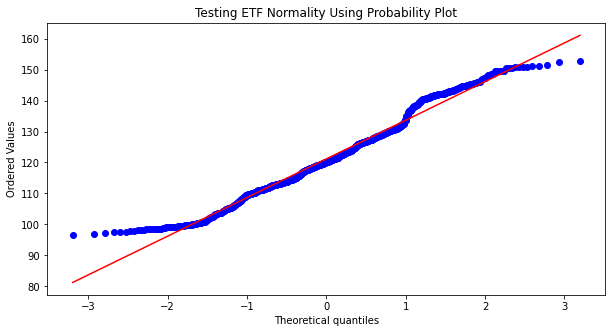

<Figure size 432x288 with 0 Axes>

In [151]:
plt.figure(figsize = (10,5))
stats.probplot(ETF, plot=plt)
plt.title('Testing ETF Normality Using Probability Plot')
plt.figure()
plt.show()

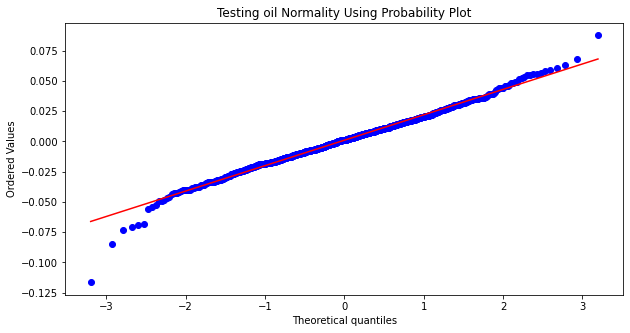

<Figure size 432x288 with 0 Axes>

In [152]:
plt.figure(figsize = (10,5))
stats.probplot(oil, plot=plt)
plt.title('Testing oil Normality Using Probability Plot')
plt.figure()
plt.show()

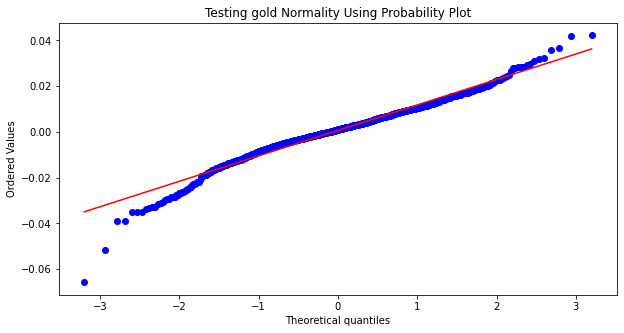

<Figure size 432x288 with 0 Axes>

In [153]:
plt.figure(figsize = (10,5))
stats.probplot(gold, plot=plt)
plt.title('Testing gold Normality Using Probability Plot')
plt.figure()
plt.show()

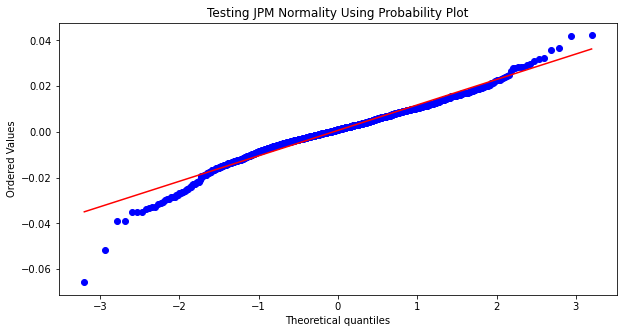

<Figure size 432x288 with 0 Axes>

In [154]:
plt.figure(figsize = (10,5))
stats.probplot(JPM, plot=plt)
plt.title('Testing JPM Normality Using Probability Plot')
plt.figure()
plt.show()

Checking the normality of each of: ETF, oil, gold, JPM using Shapiro-Walks test 

In [155]:
Shapiro_ETF= 'Shapiro test for ETF:', stats.shapiro(ETF)
Shapiro_oil= 'Shapiro test for oil:', stats.shapiro(oil)
Shapiro_gold= 'Shapiro test for gold:', stats.shapiro(gold)
Shapiro_JPM= 'Shapiro test for JPM:', stats.shapiro(JPM)


In [156]:
Shapiro_ETF, Shapiro_oil, Shapiro_gold, Shapiro_JPM

(('Shapiro test for ETF:',
  ShapiroResult(statistic=0.9795047640800476, pvalue=1.1655147680311728e-10)),
 ('Shapiro test for oil:',
  ShapiroResult(statistic=0.9886544346809387, pvalue=5.487161729433865e-07)),
 ('Shapiro test for gold:',
  ShapiroResult(statistic=0.9692050814628601, pvalue=1.0206207623833508e-13)),
 ('Shapiro test for JPM:',
  ShapiroResult(statistic=0.9692050814628601, pvalue=1.0206207623833508e-13)))

Normality test for ETF : Based on Shapiro Wilk test (p-value=1.1655147680311728e-10 is less than the significance level=0.05) and the probabilility plot, we reject the null hypothesis. We conclude that ETF (Exchange Trade Fund) variable is not normally distributed.

Normality test for the daily relative change in the gold price : Based on Shapiro Wilk test (p-value=5.487161729433865e-07 is less than the significance level=0.05), and the probabilility plot, we reject the null hypothesis. We conclude that oil variable is not normally distributed.

Normality test for the daily relative change in the oil price: Based on Shapiro Wilk test p-value=1.0206207623833508e-13 is less than the significance level=0.05), and the probabilility plot, we reject the null hypothesis. We conclude that gold variable is not normally distributed.

Normality test for JPM: Based on Shapiro Wilk test (p-value=1.5373954886932495e-10 is less than the significance level=0.05), and the probabilility plot , we reject the null hypothesis. We conclude that gold variable is not normally distributed.

Part 4: Break your data into small groups and let them discuss the importance of the Central Limit TheoremRequirements–Consider the ETF column (1000 values) as the population(x), and do the follows. Any software may be used.1)Calculate the mean 𝜇𝑥and the standard deviation 𝜎𝑥of the population.2)Break the population into 50 groups sequentiallyand each group includes 20 values. 
3)Calculate the sample mean (𝑥) of each group. Draw a histogram of all thesample means. Comment on the distribution of these sample means,i.e., use the histogram to assess the normality of the dataconsisting of these sample means.4)Calculate the mean (𝜇𝑥)and the standard deviation (𝜎𝑥)of the data includingthesesample means. Make a comparison between𝜇𝑥and𝜇𝑥, between 𝜎𝑥√𝑛and𝜎𝑥. Here, 𝑛is the number of sample means calculated from Item 3) above.5)Are the results from Items 3) and 4) consistent with the Central Limit Theorem? Why?6)Break the population into 10 groups sequentially and each group includes 100 values.7)Repeat Items 3) ~ 5).8)Generate 50 simple randomsamples or groups (with replacement) from the population. The size of each sample is 20, i.e., each group includes 20 values.9)Repeat Items 3) ~ 5).10)Generate 10 simple randomsamples or groups (with replacement) from the population. The size of each sample is 100, i.e., each group includes 100 values.11)Repeat Items 3) ~ 5).12)In Part 3of the project, you have figured out the distribution of the population (the entire ETF column). Does this information have any impact on the distribution of the sample mean(s)? Explain your answer

In [157]:
#1) Calculate the mean 𝜇𝑥 and the standard deviation 𝜎𝑥 of the population (ETF).
#2) Break the population into 50 groups sequentially and each group includes 20 values.

mean_x= np.mean(ETF)
mean_x

121.1529600120001

In [158]:
stdv_x= np.std(ETF)
stdv_x

12.563503845944297

In [159]:
chunk_size= 20
output = [ETF[i:i + chunk_size] for i in range(0, len(ETF), chunk_size)]

In [160]:
output

[0      97.349998
 1      97.750000
 2      99.160004
 3      99.650002
 4      99.260002
 5      98.250000
 6      99.250000
 7     100.300003
 8     100.610001
 9      99.559998
 10    101.660004
 11    101.660004
 12    101.570000
 13    100.019997
 14     99.440002
 15     98.419998
 16     98.519997
 17     97.529999
 18     98.800003
 19     97.660004
 Name: Close_ETF, dtype: float64,
 20     97.629997
 21     98.529999
 22     99.769997
 23     98.739998
 24    100.699997
 25    101.150002
 26    100.580002
 27     99.300003
 28    100.239998
 29    100.730003
 30    100.510002
 31     99.919998
 32     98.500000
 33     99.510002
 34     98.279999
 35     99.169998
 36     99.239998
 37     98.489998
 38    100.230003
 39     99.860001
 Name: Close_ETF, dtype: float64,
 40     99.400002
 41     99.160004
 42     99.389999
 43     98.510002
 44     98.510002
 45     96.419998
 46     96.980003
 47     98.000000
 48     98.279999
 49     98.650002
 50     99.550003
 51     99.040

In [161]:
#3) Calculate the sample mean (𝑥) of each group. 
#Draw a histogram of all the sample means. 
#Comment on the distribution of these sample means, i.e., use the histogram to assess the normality of the data consisting of these sample means.

mean= [np.mean(output[i]) for i in range(0,len(output))]

In [162]:
STDV= [np.std(output[i]) for i in range(0,len(output))]

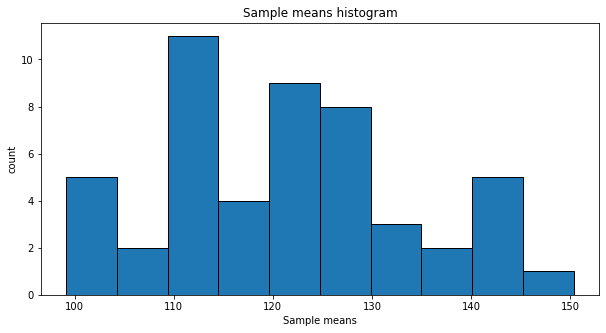

In [163]:
plt.figure(figsize = (10,5))
plt.hist(mean, bins= 10, edgecolor='black')
plt.title('Sample means histogram')
plt.xlabel("Sample means")
plt.ylabel("count")
plt.show()


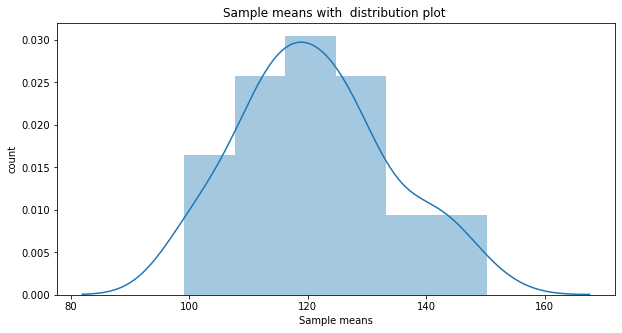

In [164]:
plt.figure(figsize = (10,5))
sns.distplot(mean)
plt.title('Sample means with  distribution plot ')
plt.xlabel("Sample means")
plt.ylabel("count")
plt.show()

In [165]:
#4- Calculate the mean (μ ¯x) and the standard deviation ( σ ¯x) of the data including these sample means. Make a comparison between 𝜇𝑥 and μ ¯x between (σx )/√n and σ¯x . 
#Here, 𝑛 is the number of sample means calculated from Item 3) above.

mean_xbar= np.mean(output)
mean_xbar

121.152960012

In [166]:
stdv_xbar= np.std(output)
stdv_xbar

12.563503845944297

In [167]:
standared_error_of_the_mean = sem(ETF)
standared_error_of_the_mean

0.39749167100151006

In [168]:
print("Mean of x =" , np.mean(ETF))  

Mean of x = 121.1529600120001


In [169]:
print("Mean of x_bar =" , mean_xbar)  

Mean of x_bar = 121.152960012


In [170]:
print('Standared deviation x_bar =', stdv_xbar)

Standared deviation x_bar = 12.563503845944297


In [171]:
#6) Break the population into 10 groups sequentially and each group includes 100 values.
chunk_size= 100
output_10 = [ETF[i:i + chunk_size] for i in range(0, len(ETF), chunk_size)]

In [172]:
#7) Repeat Items 3) ~ 5).Calculate the sample mean (𝑥) of each group. Draw a histogram of all the sample means. Comment on the distribution of these sample means, i.e., use the histogram to assess the normality of the data consisting of these sample means

mean_10= [np.mean(output_10[i]) for i in range(0,len(output_10))]

In [173]:
STDV_10= [np.std(output_10[i]) for i in range(0,len(output_10))]

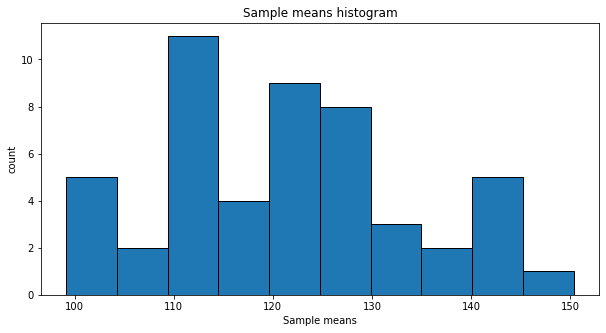

In [174]:
plt.figure(figsize = (10,5))
plt.hist(mean, bins= 10, edgecolor='black')
plt.title('Sample means histogram')
plt.xlabel("Sample means")
plt.ylabel("count")
plt.show()

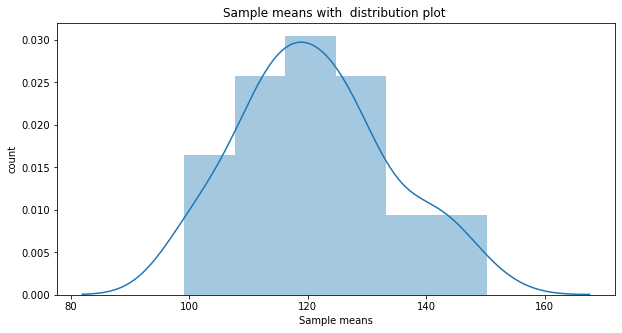

In [175]:
plt.figure(figsize = (10,5))
sns.distplot(mean)
plt.title('Sample means with  distribution plot ')
plt.xlabel("Sample means")
plt.ylabel("count")
plt.show()

In [176]:
mean_xbar_10= np.mean(output_10)
mean_xbar_10

121.152960012

In [177]:
stdv_xbar_10 = np.std(output_10)
stdv_xbar_10

12.563503845944297

In [178]:
standared_error_10= sem(ETF)
standared_error_10

0.39749167100151006

8) Generate 50 simple random samples or groups (with replacement) from the population.
The size of each sample is 20, i.e., each group includes 20 values.

First, We created the fun below to generate random samples, but I put it in comment instead and did the funs manually, as in  part 5 and part 6 we should pick a sample to work on. Asking for same sample used in 5 to be used in 6. If you have different appoinion let me know


#def sample_mean_calculator(population_array, sample_size, n_samples):
    sample_means=[]
    for i in range(n_samples):
        sample=np.random.choice(population_array, size=sample_size, replace =True)
        sample_mean=np.mean(sample)
        sample_means.append(sample_mean)
    return sample_means
    

#mean_xbar=[(sample_mean_calculator(ETF, 50, 20))]
sample_mean_xbar=[]
for i in mean_xbar:
   sample_mean_xbar.append(np.mean(i))
sample_mean_xbar

    
#sample_means_50samples= plt.hist(sample_mean_calculator(ETF, 50, 20))

In [179]:
sample_rv_1=ETF.sample(n=20, replace=True)
sample_rv_2=ETF.sample(n=20, replace=True)
sample_rv_3=ETF.sample(n=20, replace=True)
sample_rv_4=ETF.sample(n=20, replace=True)
sample_rv_5=ETF.sample(n=20, replace=True)
sample_rv_6=ETF.sample(n=20, replace=True)
sample_rv_7=ETF.sample(n=20, replace=True)
sample_rv_8=ETF.sample(n=20, replace=True)
sample_rv_9=ETF.sample(n=20, replace=True)
sample_rv_10=ETF.sample(n=20, replace=True)
sample_rv_11=ETF.sample(n=20, replace=True)
sample_rv_12=ETF.sample(n=20, replace=True)
sample_rv_13=ETF.sample(n=20, replace=True)
sample_rv_14=ETF.sample(n=20, replace=True)
sample_rv_15=ETF.sample(n=20, replace=True)
sample_rv_16=ETF.sample(n=20, replace=True)
sample_rv_17=ETF.sample(n=20, replace=True)
sample_rv_18=ETF.sample(n=20, replace=True)
sample_rv_19=ETF.sample(n=20, replace=True)
sample_rv_20=ETF.sample(n=20, replace=True)
sample_rv_21=ETF.sample(n=20, replace=True)
sample_rv_22=ETF.sample(n=20, replace=True)
sample_rv_23=ETF.sample(n=20, replace=True)
sample_rv_24=ETF.sample(n=20, replace=True)
sample_rv_25=ETF.sample(n=20, replace=True)
sample_rv_26=ETF.sample(n=20, replace=True)
sample_rv_27=ETF.sample(n=20, replace=True)
sample_rv_28=ETF.sample(n=20, replace=True)
sample_rv_29=ETF.sample(n=20, replace=True)
sample_rv_30=ETF.sample(n=20, replace=True)
sample_rv_31=ETF.sample(n=20, replace=True)
sample_rv_32=ETF.sample(n=20, replace=True)
sample_rv_33=ETF.sample(n=20, replace=True)
sample_rv_34=ETF.sample(n=20, replace=True)
sample_rv_35=ETF.sample(n=20, replace=True)
sample_rv_36=ETF.sample(n=20, replace=True)
sample_rv_37=ETF.sample(n=20, replace=True)
sample_rv_38=ETF.sample(n=20, replace=True)
sample_rv_39=ETF.sample(n=20, replace=True)
sample_rv_40=ETF.sample(n=20, replace=True)
sample_rv_41=ETF.sample(n=20, replace=True)
sample_rv_42=ETF.sample(n=20, replace=True)
sample_rv_43=ETF.sample(n=20, replace=True)
sample_rv_44=ETF.sample(n=20, replace=True)
sample_rv_45=ETF.sample(n=20, replace=True)
sample_rv_46=ETF.sample(n=20, replace=True)
sample_rv_47=ETF.sample(n=20, replace=True)
sample_rv_48=ETF.sample(n=20, replace=True)
sample_rv_49=ETF.sample(n=20, replace=True)
sample_rv_50=ETF.sample(n=20, replace=True)


In [180]:
#9) Repeat Items 3) ~ 5).
#9)-[3) Calculate the sample mean (𝑥) of each group.

all_samples=[sample_rv_1,sample_rv_2,sample_rv_3,sample_rv_4,sample_rv_5,sample_rv_6,sample_rv_7,sample_rv_8,sample_rv_9,sample_rv_10,sample_rv_11,sample_rv_12,sample_rv_13,sample_rv_14,sample_rv_15,sample_rv_16,sample_rv_17,sample_rv_18,sample_rv_19,sample_rv_20,sample_rv_21,sample_rv_22,sample_rv_23,sample_rv_24,sample_rv_25,sample_rv_26,sample_rv_27,sample_rv_28,sample_rv_29,sample_rv_30,sample_rv_31,sample_rv_32,sample_rv_33,sample_rv_34,sample_rv_35,sample_rv_36,sample_rv_37,sample_rv_38,sample_rv_39,sample_rv_40,sample_rv_41,sample_rv_42,sample_rv_43,sample_rv_44,sample_rv_45,sample_rv_46,sample_rv_47,sample_rv_48,sample_rv_49, sample_rv_50]
sample_mean=[]
for i in all_samples:
    sample_mean.append(np.mean(i))
sample_mean


[118.65550044999998,
 118.28050045,
 117.3900001,
 123.51249924999999,
 124.85299995000003,
 118.05800009999999,
 114.63100010000001,
 116.07849985000003,
 117.2104992,
 123.91500015000001,
 123.33600054999997,
 128.14850030000002,
 121.2074997,
 119.8394997,
 115.8700001,
 121.8249996,
 117.77200005,
 123.65499845,
 121.44899980000005,
 120.86050025,
 117.0479992,
 122.1804997,
 118.93450045,
 122.8374996,
 122.07100140000003,
 123.81550054999998,
 118.78450014999999,
 122.97650099999998,
 121.05500034999997,
 117.26249965000002,
 117.06400099999999,
 116.8624996,
 120.73500019999999,
 119.1134988,
 125.0995002,
 117.5579991,
 115.207,
 125.22149999999999,
 117.18049999999998,
 127.45599974999998,
 121.84099954999996,
 119.02149999999997,
 123.99849895,
 120.6865005,
 119.52300025,
 119.94450005000003,
 118.99600065,
 122.06799965,
 121.32749894999999,
 122.82949945]

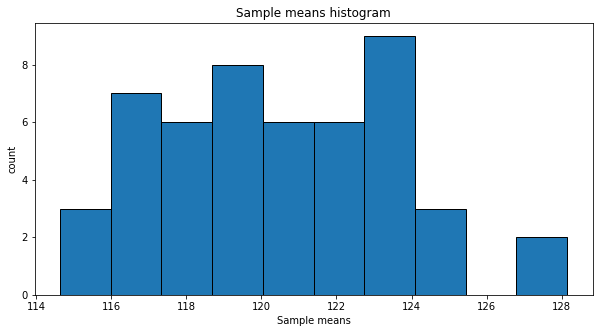

In [181]:
#Draw a histogram of all the sample means.

plt.figure(figsize = (10,5))
plt.hist(sample_mean, edgecolor='black')
plt.title('Sample means histogram')
plt.xlabel("Sample means")
plt.ylabel("count")
plt.show()

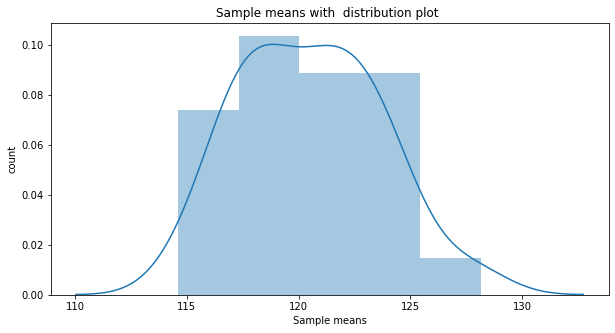

In [182]:
plt.figure(figsize = (10,5))
sns.distplot(sample_mean)
plt.title('Sample means with  distribution plot ')
plt.xlabel("Sample means")
plt.ylabel("count")
plt.show()

In [183]:
#Calculate the mean (𝜇𝑥) and the standard deviation (𝜎𝑥) of the data including these sample means. Make a comparison between 𝜇𝑥 and 𝜇𝑥 , between 𝜎𝑥 and 𝜎𝑥 . Here, 𝑛 is
#√𝑛 the number of sample means calculated from Item 3) above.

mean_xbar_rv= np.mean(sample_mean)
mean_xbar_rv

120.50492993600001

In [184]:
#9)-5 Are the results from Items 3) and 4) consistent with the Central Limit Theorem? Why?

stdv_xbar_rv = np.std(sample_mean)
stdv_xbar_rv

3.125497013034305

In [185]:
standared_error_rv= stdv_x/np.sqrt(len(sample_mean))
standared_error_rv

1.7767477529860964

In [186]:
#10) Generate 10 simple random samples or groups (with replacement) from the population. The size of each sample is 100, i.e., each group includes 100 values.

sample_size100_1=ETF.sample(n=100, replace=True)
sample_size100_2=ETF.sample(n=100, replace=True)
sample_size100_3=ETF.sample(n=100, replace=True)
sample_size100_4=ETF.sample(n=100, replace=True)
sample_size100_5=ETF.sample(n=100, replace=True)
sample_size100_6=ETF.sample(n=100, replace=True)
sample_size100_7=ETF.sample(n=100, replace=True)
sample_size100_8=ETF.sample(n=100, replace=True)
sample_size100_9=ETF.sample(n=100, replace=True)
sample_size100_10=ETF.sample(n=100, replace=True)

In [187]:
all_samples_size100=[sample_size100_1,sample_size100_2,sample_size100_3,sample_size100_4,sample_size100_5,sample_size100_6,sample_size100_7,sample_size100_8,sample_size100_9, sample_size100_10]
sample_mean_size100=[]
for i in all_samples_size100:
    sample_mean_size100.append(np.mean(i))
sample_mean_size100

[121.13710012000003,
 122.63449982000002,
 121.51040041000005,
 120.48550017999997,
 122.07129960999998,
 123.54999971999997,
 120.15510034999993,
 120.20469964999998,
 123.42100035000007,
 121.93119978999995]

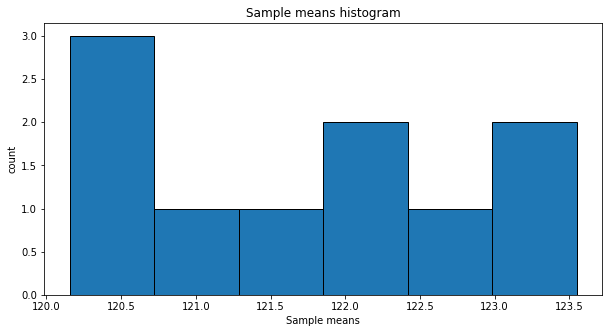

In [188]:

plt.figure(figsize = (10,5))
plt.hist(sample_mean_size100,bins = 6, edgecolor='black')
plt.title('Sample means histogram')
plt.xlabel("Sample means")
plt.ylabel("count")
plt.show()

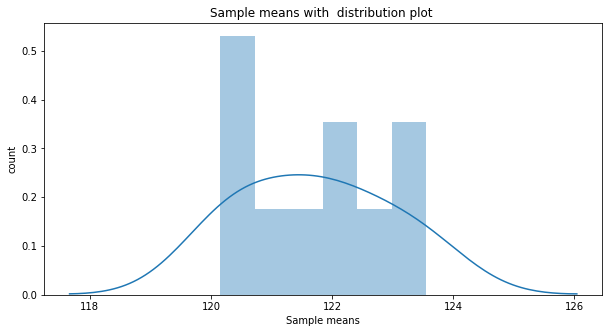

In [189]:

plt.figure(figsize = (10,5))
sns.distplot(sample_mean_size100, bins=6)
plt.title('Sample means with  distribution plot ')
plt.xlabel("Sample means")
plt.ylabel("count")
plt.show()

In [190]:
#11.4) Calculate the mean (〖μ  〗_¯x) and the standard deviation ( σ_¯x) of the data including these sample means. Make a comparison between 𝜇𝑥 and 〖μ 〗_¯x  between (σx )/√nand 〖σ 〗_¯x . Here, 𝑛 is the number of sample means calculated from Item 3) above

mean_xbar_size_100= np.mean(sample_mean_size100)
mean_xbar_size_100

121.71007999999999

In [191]:
stdv_xbar_size_100 = np.std(sample_mean_size100)
stdv_xbar_size_100

1.1789140731645937

In [192]:
standared_error_size_100= stdv_x/np.sqrt(len(sample_mean_size100))
standared_error_size_100

3.9729287545469165

Part 5: Construct a confidence interval with your dataRequirements–1)Pick up one of the 10 simple random samples you generated in Step 10) of Part 4, construct an appropriate 95% confidence interval of the mean 𝜇. 2)Pick up one of the 50 simple random samples you generated in Step 8) of Part 4, construct an appropriate 95% confidence interval of the mean 𝜇.3)In Part 1, you have calculatedthe mean 𝜇of the population (the entire ETF column) using Excel function.Do the two intervals from 1) and 2) above include (thetrue value of) the mean 𝜇? Which one is more accurate? Why?

In [193]:
#1) Pick up one of the 10 simple random samples you generated in Step 10) of Part 4, construct an appropriate 95% confidence interval of the mean 𝜇.

sample_size100_1

11     101.660004
44      98.510002
959    143.389999
211    113.779999
590    122.599998
          ...    
331    110.949997
851    136.839996
439    120.629997
311    111.099998
537    123.019997
Name: Close_ETF, Length: 100, dtype: float64

In [194]:
n= len(sample_size100_1)
con_coef= 0.95
alpha= 1.-con_coef

In [195]:
x_bar= np.mean(sample_size100_1)
x_bar

121.13710012000003

In [196]:
sigma= np.std(sample_size100_1)
sigma

13.609614872791358

In [197]:
z_critical= stats.norm.ppf(q=0.975)
z_critical

1.959963984540054

In [198]:
zinterval= stats.norm.interval(alpha=con_coef)

In [199]:
standard_error= sigma/np.sqrt(n)
standard_error

1.3609614872791358

In [200]:
CI_lower= x_bar-z_critical*standard_error
CI_upper= x_bar+z_critical*standard_error
CI_lower,CI_upper

(118.46966462058685, 123.8045356194132)

In [201]:
#2) Pick up one of the 50 simple random samples you generated in Step 8) of Part 4, construct an appropriate 95% confidence interval of the mean 𝜇.
sample_rv_2

749    126.129997
143    109.730003
164    115.870003
562    122.239998
701    130.179993
74     103.580002
178    115.129997
421    118.910004
477    115.570000
131    106.849998
191    115.989998
523    120.150002
319    112.860001
794    126.830002
393    120.389999
634    126.580002
473    114.500000
804    126.980003
705    130.410004
134    106.730003
Name: Close_ETF, dtype: float64

In [202]:
n_2= len(sample_rv_2)
con_coef= 0.95
alpha= 1.-con_coef

In [203]:
x_bar_2= np.mean(sample_rv_2)
x_bar_2

118.28050045

In [204]:
sigma_2= np.std(sample_rv_2)
sigma_2

7.8016112421446655

In [205]:
z_critical_2= stats.norm.ppf(q=0.975)
z_critical

1.959963984540054

In [206]:
zinterval_2= stats.norm.interval(alpha=con_coef)

In [207]:
standard_error_2= sigma/np.sqrt(n_2)
standard_error_2

3.0432024003153626

In [208]:
CI_lower_2= x_bar_2-z_critical_2*standard_error_2
CI_upper_2= x_bar_2+z_critical_2*standard_error_2
CI_lower_2,CI_upper_2

(112.31593334771605, 124.24506755228396)

In [209]:
#3) In Part 1, you have calculated the mean 𝜇 of the population (the entire ETF column) using Excel function. 
#Do the two intervals from 1) and 2) above include (the true value of) the mean 𝜇? Which one is more accurate? Why?



From part 1, we calculated the mean of the population (The entire ETF column)which is equals to 121.153. 
Confidence interval of the sample that we took from 10(10 random samples of 100)= (120.80933965207156, 125.63165946792854)
2- Confidence interval of the sample that we took from 8(50 random samples of 20)=(120.71898439124975, 131.50201930875022)
The true value of the mean (which is 21.153). We are 95% confident that the true mean lies in both of the above calculated intervals from two different samples. But, the first interval ((120.80933965207156, 125.63165946792854)) is more accurate as it has smaller range than the second iterval.

(You get different results each time you run the program as it will generate different random sample , but the interpretation holds true) 

Part 6: Form a hypothesis and test itwith your dataRequirements–1)Use the same sample you picked up inStep 

1) Use the Part 5 to test𝑯𝟎:𝝁=𝟏𝟎𝟎vs.𝑯𝒂:𝝁≠𝟏𝟎𝟎at the significance level 0.05. What’syour conclusion? 

2)Use the same sample you picked up inStep 2) of Part 5 to test𝑯𝟎:𝝁=𝟏𝟎𝟎vs.𝑯𝒂:𝝁≠𝟏𝟎𝟎at the significance level 0.05.What’s your conclusion?

3)Use the same sample you picked up inStep 2) of Part 5 to test𝑯𝟎:𝝈=𝟏𝟓vs.𝑯𝒂:𝝈≠𝟏𝟓at the significance level 0.05. What’s your conclusion?

4)Use the same sample you picked up inStep 2) of Part 5 to test𝑯𝟎:𝝈=𝟏𝟓vs.𝑯𝒂:𝝈<𝟏𝟓at the significance level 0.05. What’s your conclusion?

In [210]:
#1) Use the Part 5 to test𝑯𝟎:𝝁=𝟏𝟎𝟎vs.𝑯𝒂:𝝁≠𝟏𝟎𝟎at the significance level 0.05. What’syour conclusion?

print("The Null Hypothesis(H0) is: The Population Mean  is 100 " )
print("The Alternate Hypothesis(Halpha) is: The Population Mean is not equal to 100 " )


sample_mean_size_10 = np.mean(sample_mean_size100)
sample_mean_size_10 = round(sample_mean_size_10,2)
print("The sample mean is:",sample_mean_size_10)
print("the population mean is: ",ETF.mean())

print("----------The t-test for a sample of 10 elements is as follows--------")
tset, pval = stats.ttest_1samp(sample_mean_size100,100)
print("The value of the test statistic is: ",tset)
print('the p-value is:',pval)
print('\n')
print("----------The Conclusion for the above hypothesis test ----------")
if pval < 0.05:    # alpha value is 0.05 or 5%
    print("We are rejecting null hypothesis")
else:
    print("We are accepting null hypothesis")

The Null Hypothesis(H0) is: The Population Mean  is 100 
The Alternate Hypothesis(Halpha) is: The Population Mean is not equal to 100 
The sample mean is: 121.71
the population mean is:  121.1529600120001
----------The t-test for a sample of 10 elements is as follows--------
The value of the test statistic is:  55.24596022945841
the p-value is: 1.0493847013533123e-12


----------The Conclusion for the above hypothesis test ----------
We are rejecting null hypothesis


In [211]:
#2)Use the same sample you picked up inStep 2) of Part 5 to test𝑯𝟎:𝝁=𝟏𝟎𝟎vs.𝑯𝒂:𝝁≠𝟏𝟎𝟎at the significance level 0.05.What’s your conclusion?

print("The Null Hypothesis(H0) is: The Population Mean  is 100 " )
print("The Alternate Hypothesis(Halpha) is: The Population Mean is not equal to 100 " )
tset, pval = stats.ttest_1samp(sample_rv_2,100)  
print("The sample mean is:",sample_rv_2.mean())
print("the population mean is: ",ETF.mean())

print("----------The t-test for a sample of 20 elements is as follows--------")
tset, pval = stats.ttest_1samp(sample_rv_2,100)
print("The value of the test statistic is: ",tset)
print('the p-value is:',pval)
print('\n')
print('---------The conclusion for the above hypothesis test --------- ')
if pval < 0.05:    # alpha value is 0.05 or 5%
    print("We are rejecting null hypothesis")
else:
    print("We are accepting null hypothesis")

The Null Hypothesis(H0) is: The Population Mean  is 100 
The Alternate Hypothesis(Halpha) is: The Population Mean is not equal to 100 
The sample mean is: 118.28050045
the population mean is:  121.1529600120001
----------The t-test for a sample of 20 elements is as follows--------
The value of the test statistic is:  10.213640698789161
the p-value is: 3.7400845802444764e-09


---------The conclusion for the above hypothesis test --------- 
We are rejecting null hypothesis


In [212]:
#3)Use the same sample you picked up inStep 2) of Part 5 to test𝑯𝟎:𝝈=𝟏𝟓vs.𝑯𝒂:𝝈≠𝟏𝟓at the significance level 0.05. What’s your conclusion?

print("The Null Hypothesis(H0) is: The Population Standard Deviation is 15 " )
print("The Alternate Hypothesis(Halpha) is: The Population Standard Deviation not equal to 15 " )
alpha = 0.05
df = len(sample_rv_2)-1
cv = scipy.stats.chi2.ppf(1-alpha, df)
given_sd = 15
n = len(sample_rv_2)
s = sample_rv_2.std()
chi_2 = ((n-1)*s**2)/(given_sd)**2
print("            --Chi Square Test--          ")
print("The degrees of freedom is:", df)
print("The Sample standard deviation is: ",sample_rv_2.std())
print("The Population standard deviation given is:", 15)
print("The value of the chi square is : ",chi_2 )
print("The critical value is: ",cv)
print('\n')
print("----------The Conclusion for the above hypothesis test ----------")
if chi_2 < cv:    # alpha value is 0.05 or 5%
    print(" We are rejecting null hypothesis")
else:
    print("We are accepting null hypothesis")

The Null Hypothesis(H0) is: The Population Standard Deviation is 15 
The Alternate Hypothesis(Halpha) is: The Population Standard Deviation not equal to 15 
            --Chi Square Test--          
The degrees of freedom is: 19
The Sample standard deviation is:  8.004284245824596
The Population standard deviation given is: 15
The value of the chi square is :  5.410234486538492
The critical value is:  30.14352720564616


----------The Conclusion for the above hypothesis test ----------
 We are rejecting null hypothesis


In [213]:
#4)Use the same sample you picked up inStep 2) of Part 5 to test𝑯𝟎:𝝈=𝟏𝟓vs.𝑯𝒂:𝝈<𝟏𝟓at the significance level 0.05. What’s your conclusion?

print("The Null Hypothesis(H0) is: The Population Standard Deviation is 15 " )
print("The Alternate Hypothesis(Halpha) is: The Population Standard Deviation less than 15 " )
alpha = 0.05
df = len(sample_rv_2)-1
cv = scipy.stats.chi2.ppf(1-alpha, df)
given_sd = 15
n = len(sample_rv_2)
s = sample_rv_2.std()
chi_2 = ((n-1)*s**2)/(given_sd)**2
print("            --Chi Square Test--          ")
print("The degrees of freedom is:", df)
print("The Sample standard deviation is: ",sample_rv_2.std())
print("The Population standard deviation given is:", 15)
print("The value of the chi square is : ",chi_2 )
print("The critical value is: ",cv)
print('\n')
print("----------The Conclusion for the above hypothesis test ----------")
if chi_2 < cv:    # alpha value is 0.05 or 5%
    print(" We are rejecting null hypothesis")
else:
    print("We are accepting null hypothesis")

The Null Hypothesis(H0) is: The Population Standard Deviation is 15 
The Alternate Hypothesis(Halpha) is: The Population Standard Deviation less than 15 
            --Chi Square Test--          
The degrees of freedom is: 19
The Sample standard deviation is:  8.004284245824596
The Population standard deviation given is: 15
The value of the chi square is :  5.410234486538492
The critical value is:  30.14352720564616


----------The Conclusion for the above hypothesis test ----------
 We are rejecting null hypothesis


Part 7: Compare your data with a different data setRequirements–
    
1)Consider the entire Gold column as a random sample from the first population, and the entire Oil column as a random sample from the second population. Assuming these two samples bedrawn independently, form a hypothesis and test it to see if the Gold and Oil have equal means in the significance level 0.05.
    
2)Subtract the entire Gold column from the entire Oil column and generate a sample of differences. Consider this sample as a random sample from the target population of differences between Gold and Oil. Form a hypothesis and test it to see if the Gold and Oil have equal means in the significance level 0.05.
    
3)Consider the entire Gold column as a random sample from the first population,and the entire Oil column as a random sample from the second population. Assuming these two samples be drawn independently, form a hypothesis and test it to see if the Gold and Oil have equal standard deviationsin the significance level 0.05.

In [214]:
#1)Consider the entire Gold column as a random sample from the first population, and the entire Oil column as a random sample from the second population. Assuming these two samples bedrawn independently, form a hypothesis and test it to see if the Gold and Oil have equal means in the significance level 0.05.

print("The Null Hypothesis(H0) is: The gold and oil have equal means" )
print("The Alternate Hypothesis(Halpha) is: The gold and oil do not have equal means" )
print('\n')
from scipy.stats import ttest_ind

oil_mean = np.mean(oil)
gold_mean = np.mean(gold)
print("oil mean value:",oil_mean)
print("gold mean value:",gold_mean)
oil_std = np.std(oil)
gold_std = np.std(gold)
print("oil std value:",oil_std)
print("gold std value:",gold_std)
ttest,pval = ttest_ind(oil,gold)
print("p-value:",pval)
print("Test statistic:",ttest)
print('\n')
print("----------The Conclusion for the above hypothesis test ----------")
if pval <0.05:
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")

The Null Hypothesis(H0) is: The gold and oil have equal means
The Alternate Hypothesis(Halpha) is: The gold and oil do not have equal means


oil mean value: 0.0010300354937470015
gold mean value: 0.0006628360819999998
oil std value: 0.021082349463798354
gold std value: 0.011283414317347945
p-value: 0.6274695258306375
Test statistic: 0.48536661382360874


----------The Conclusion for the above hypothesis test ----------
We accept null hypothesis


In [215]:
#2)Subtract the entire Gold column from the entire Oil column and generate a sample of differences. Consider this sample as a random sample from the target population of differences between Gold and Oil. Form a hypothesis and test it to see if the Gold and Oil have equal means in the significance level 0.05.

from scipy.stats import sem
from scipy.stats import t
print("The Null Hypothesis(H0) is: The gold and oil have no difference in means" )
print("The Alternate Hypothesis(Halpha) is: The gold and oil have different means" )
print('\n')

oil_mean = np.mean(oil)
gold_mean = np.mean(gold)
diff = oil.subtract(gold)
diff_mean = np.mean(diff)

std1, std2 = np.std(oil, ddof=1), np.std(gold, ddof=1)
sd_diff = std1-std2
se1, se2 = sem(oil), sem(gold)
sed = np.sqrt(se1**2.0 + se2**2.0)
t_stat = (oil_mean - gold_mean) / sed
df = 1000 + 1000 - 2

cv = t.ppf(1.0 - 0.05, df)

# calculate the p-value
pval = (1 - t.cdf(abs(t_stat), df)) * 2


print("The mean of differences is:" ,diff_mean)
print("The standard deviation of differences is:" ,sd_diff)
print("diff",diff)
print('------------')
print("Standard deviation for oil and gold",std1,std2)
print("Standard error for oil and gold :" ,se1,se2)
print("Standard error between differences",sed)
print("The T-statistic is:",t_stat)
print("Degrees of freedom:",df)
print("The critical value is:",cv)
print("The pvalue is:",pval)

print('\n')
print("----------The Conclusion for the above hypothesis test ----------")
if pval <0.05:
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")

The Null Hypothesis(H0) is: The gold and oil have no difference in means
The Alternate Hypothesis(Halpha) is: The gold and oil have different means


The mean of differences is: 0.00036719941174700126
The standard deviation of differences is: 0.009803838291689165
diff 0      0.034574
1      0.003320
2     -0.023577
3      0.019931
4      0.025038
         ...   
995    0.005118
996    0.005984
997    0.042315
998   -0.004235
999    0.018364
Length: 1000, dtype: float64
------------
Standard deviation for oil and gold 0.021092898551005306 0.011289060259316142
Standard error for oil and gold : 0.0006670160187604208 0.0003569914306233009
Standard error between differences 0.0007565403167191244
The T-statistic is: 0.4853666138236085
Degrees of freedom: 1998
The critical value is: 1.6456166300576656
The pvalue is: 0.6274695258306378


----------The Conclusion for the above hypothesis test ----------
We accept null hypothesis


In [216]:
# 3.Consider the entire Gold column as a random sample from the first population,and the entire Oil column as a random sample from the second population. Assuming these two samples be drawn independently, form a hypothesis and test it to see if the Gold and Oil have equal standard deviations in the significance level 0.05.

print("The Null Hypothesis(H0) is: The oil and gold have equal Standard Deviation" )
print("The Alternate Hypothesis(Halpha) is: The oil and gold does not have equal Standard Deviation" )
print('\n')

df1=len(oil)-1
df2 = len(gold)-1
sd_oil = np.std(oil, ddof = df1)
sd_gold = np.std(gold, ddof = df2)

f_stat= sd_gold**2 /sd_oil**2 

pval =  1-scipy.stats.f.cdf(f_stat, df1, df2)
print("The degrees of freedom for oil is:" + str(df1) + "and gold is:" + str(df2))
print("The standard deviation of oil is: ",sd_oil)
print("The standard deviation of gold is: ",sd_gold)
print("The f- statistic is : ",f_stat )
print("The p value is: ",pval)
print('\n')
print("----------The Conclusion for the above hypothesis test ----------")
if pval <0.05:
    print("We reject null hypothesis")
else:
    print("We accept null hypothesis")

The Null Hypothesis(H0) is: The oil and gold have equal Standard Deviation
The Alternate Hypothesis(Halpha) is: The oil and gold does not have equal Standard Deviation


The degrees of freedom for oil is:999and gold is:999
The standard deviation of oil is:  0.6666824273323234
The standard deviation of gold is:  0.35681289026173446
The f- statistic is :  0.28644619306997154
The p value is:  1.0


----------The Conclusion for the above hypothesis test ----------
We accept null hypothesis


Part 8: Fitting the line to the dataRequirements–Consider the data including the ETT column and Gold column only. Using any software,
    
1)Draw a scatter plot of ETF (Y) vs. Gold(X). Is there any linear relationship between them which can be observed from the scatter plot?
    
2)Calculate the coefficient of correlation between ETF and Gold and interpret it.
    
3)Fit a regression line (or least squares line, best fitting line) to the scatter plot. What are the intercept and slope of this line? How to interpret them?
    
4)Conduct a two-tailed t-test with𝐻0:𝛽1=0. What is the P-value of the test? Is the linear relationship between ETF (Y) and Gold (X) significant at the significance level 0.01? Why or why not?
        
5)Suppose that you use the coefficient of determination to assess thequality of this fitting. Is it a good model? Why or why not?

6)What are the assumptions you made for this model fitting?

7)Given the daily relative change in the gold price is 0.005127. Calculate the 99% confidence interval of the mean daily ETF return, and the 99% prediction interval of the individual daily ETF return.

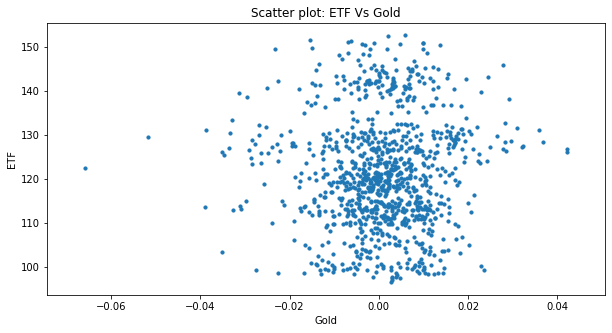

In [8]:
#Part 8 - 1 : Scatter plot of ETF(Y) vs Gold(X)

#Scatter plot : ETV vs Gold
plt.figure(figsize = (10,5))
y1 = ETF
x1 = gold
plt.scatter(x1, y1, marker='o',s=10)
plt.ylabel('ETF')
plt.xlabel('Gold')
plt.title('Scatter plot: ETF Vs Gold' )
plt.show()

There is no linear relationship that can be observed from the above scatter plot.

In [9]:
#Part 8 - 2 : Coefficient of correlation between ETF and Gold

pearson_coeff = x1.corr(y1)  

print("Coefficient of correlation between ETF and Gold is ",pearson_coeff)

Coefficient of correlation between ETF and Gold is  0.022995570076054607


The Coefficient of Correlation is 0.02299 which is low in value indicating that there is a weak linear relationship between the ETF and Gold

Slope is :  25.604389324427277 
Intercept is :  121.13598849889819


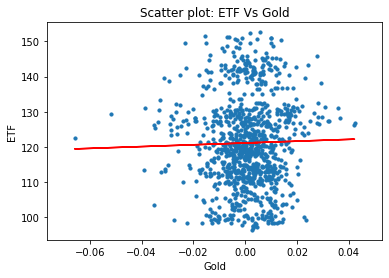

In [10]:
#Part 8 - 3 : Fit a regression line (or least squares line, best fitting line) to the 
#scatter plot. What are the intercept and slope of this line? How to interpret them?

b1, b0, r_value, p_value, std_err = linregress(x1, y1)

print("Slope is : ", b1,"\nIntercept is : ",b0)

y2 = b1*x1+b0

plt.scatter(x1, y1, marker='o',s=10)
plt.plot(x1,y2,'r-')
plt.ylabel('ETF')
plt.xlabel('Gold')
plt.title('Scatter plot: ETF Vs Gold' )
plt.show()


From the above values, we can assume that daily ETF returns increase by 25 for every unit change in the price of gold. For no change in the gold price, daily ETF returns remain constant at approximately 121

In [220]:
#Part 8 - 4 : Conduct a two-tailed t-test with 𝐻0: 𝛽1 = 0. What is the P-value of the test? Is the linear
#relationship between ETF (Y) and Gold (X) significant at the significance level 0.01?
#Why or why not?


print("Null Hypothesis is B1 = 0\n\nAlternate Hypothesis is B1 != 0")

Null Hypothesis is B1 = 0

Alternate Hypothesis is B1 != 0


In [221]:
#Using OLS model - Alternative method for two tailed t test 

x2 = sm.add_constant(x1)
results = sm.OLS(y1, x2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Close_ETF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5280
Date:                Mon, 07 Dec 2020   Prob (F-statistic):              0.468
Time:                        06:09:19   Log-Likelihood:                -3949.5
No. Observations:                1000   AIC:                             7903.
Df Residuals:                     998   BIC:                             7913.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.1360      0.398    304.155      0.0

We see that the p-value is greater than the significance level indicating that the null hypothesis should be accepted. Hence there is no significant relationship between the variables in the linear regression model of the data set. Therefore, we cannot use the regression line to model a linear relationship between Gold and ETF

In [222]:
#Part 8 - 5 : Suppose that you use the coefficient of determination to assess the quality of this fitting.
#Is it a good model? Why or why not?

correlation_matrix = np.corrcoef(x1, y1)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
print("Coefficient of Determination : ",r_squared)

Coefficient of Determination :  0.0005287962431227381


The r-squared value is very small, almost 0 in the above case. In terms of percentages we can assume it to be 0% which indicates that the chosen model of linear regression is not a good fit. 

Part 8 - 6 : What are the assumptions you made for this model fitting?

Assumptions made : 

1. There is a linear relationship between ETF and Gold wherein Gold is the independent variable and ETF is the dependent variable
2. Both variables follow a normal distribution
3. There is very little or no multicollinearity 
4. There is no autocorrelation
5. Data is homoscedastic i.e. there is no Heteroscedasticity

In [223]:
#Part 8 - 7a : Calculate the 99% confidence interval of the mean daily ETF return

mean_etf = np.mean(y1)
std_etf = np.std(y1)
size_etf = np.size(y1)
z_score = st.norm.ppf((1 + 0.99) / 2.)

se = std_etf /np.sqrt(size_etf)

lcb = mean_etf - z_score * se  #lower limit of the CI
ucb = mean_etf + z_score * se  #upper limit of the CI

print("99%% confidence interval is between %.3f and %.3f" % (lcb, ucb))

99% confidence interval is between 120.130 and 122.176


In [224]:
#Part 8 - 7b : Given the daily relative change in the gold price is 0.005127, calculate the 99% prediction interval of the 
#individual daily ETF return.

#Predicted ETF value for given daily change in gold price of 0.005127

#Predict y for the model coefficients and x 
yhat = b0 + b1 * x1

In [225]:
#Using the model, find the new ETF for given change in gold price is 0.005127
x_new = 0.005127
yhat_new = b0 + b1 * x_new
yhat_new

121.26726220296453

In [226]:
#99% prediction interval 
sum_errs = arraysum((y1 - yhat)**2)
stdev = sqrt(1/(len(y1)-2) * sum_errs)
z_score = st.norm.ppf((1 + 0.99) / 2.)

interval = z_score * stdev
lower, upper = yhat_new - interval, yhat_new + interval
print('99%% prediction interval is between %.3f and %.3f' % (lower, upper))

99% prediction interval is between 88.882 and 153.653


Part 9: Does your model predict?Requirements–Consider the data including the ETF, Gold and Oil column. Using any software, fit a multiple linear regression model to the data with the ETF variable as the response. Evaluate your model with adjusted 𝑅2. 

In [227]:
data= pd.read_excel('data.xlsx')
X = data[['oil','gold','JPM']] 
Y = data['Close_ETF']

In [228]:
#Part 9 : Consider the data including the ETF, Gold and Oil column. Using any software, fit a multiple linear 
#regression model to the data with the ETF variable as the response. Evaluate your model with adjusted 𝑅 squared

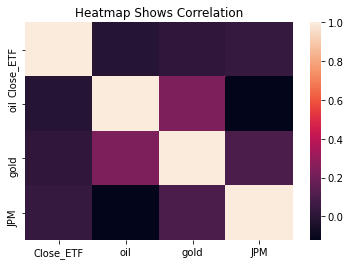

In [229]:
correlation= data.corr()
correlation
heatmaps= sns.heatmap(correlation)
plt.title('Heatmap Shows Correlation')
plt.show()

In [230]:
regression=LinearRegression()
regression.fit(data[['oil','gold']],data.Close_ETF)

LinearRegression()

In [231]:
LinearRegression()

LinearRegression()

In [232]:
regression.intercept_

121.14272529601266

intercept and coef

In [233]:
regression.coef_

array([-9.12609977, 29.62259178])

In [234]:
x=data.drop(['Close_ETF','JPM'], axis=1)
y=data[['Close_ETF']]

In [235]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.20, random_state=1)
regression_model=LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression()

In [236]:
intercept=regression_model.intercept_[0]
intercept

121.20977708475517

In [237]:
coef=regression_model.coef_[0][0]
coef

-14.768516811708288

In [238]:
print("The intercept for our model is {:0.4}".format(intercept))
print('-'*100)
for coef in zip(x.columns,regression_model.coef_[0]):
    print("The coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 121.2
----------------------------------------------------------------------------------------------------
The coefficient for oil is -1.5e+01
The coefficient for gold is 3.8e+01


get prediction 

In [239]:
y_predict=regression_model.predict(x_test)
y_predict

array([[121.73020138],
       [121.31294808],
       [120.83804851],
       [121.40708007],
       [121.42700258],
       [121.20734205],
       [120.91289561],
       [120.68116165],
       [120.73282597],
       [121.9048003 ],
       [121.13821389],
       [121.80342937],
       [121.28740272],
       [121.12609465],
       [121.19263748],
       [121.50385688],
       [120.91254683],
       [119.98224808],
       [121.2126918 ],
       [121.14292676],
       [121.5529315 ],
       [121.43570033],
       [121.38545863],
       [121.2279462 ],
       [121.65877864],
       [121.15119337],
       [120.69860138],
       [122.04401513],
       [121.21670616],
       [121.05366637],
       [121.7462841 ],
       [121.57708962],
       [119.76843538],
       [121.05479102],
       [120.08130718],
       [121.51516627],
       [121.66500275],
       [120.81924191],
       [121.41849539],
       [121.09880211],
       [121.04656696],
       [121.77376506],
       [121.49354673],
       [120

Lets check R Squared (R-squared (How well our data fit the model)

In [240]:
model_r2= r2_score(y_test, y_predict)
print('R-squared is', model_r2)


R-squared is -0.003234536878204075


In [241]:
x2= sm.add_constant(x)

In [242]:
model= sm.OLS(y,x2)

In [243]:
estimate= model.fit()

In [244]:
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:              Close_ETF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3743
Date:                Mon, 07 Dec 2020   Prob (F-statistic):              0.688
Time:                        06:09:20   Log-Likelihood:                -3949.4
No. Observations:                1000   AIC:                             7905.
Df Residuals:                     997   BIC:                             7919.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.1427      0.399    303.856      0.0

adding a third variable in hope of improving our model

In [11]:
X = data[['oil','gold','JPM']] 
Y = data['Close_ETF']

In [12]:


#Using OLS model to fit multi linear regression model with oil,gold and JPM as independent variables 
#and Close_ETF as dependent variable

X1 = sm.add_constant(X)
model = sm.OLS(Y, X1).fit()
Y_pred = model.predict(X1) 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Close_ETF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6079
Date:                Mon, 07 Dec 2020   Prob (F-statistic):              0.610
Time:                        09:58:51   Log-Likelihood:                -3948.8
No. Observations:                1000   AIC:                             7906.
Df Residuals:                     996   BIC:                             7925.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.1228      0.399    303.464      0.0

In [247]:
print("The coefficients of the model are :\n", model.params)

The coefficients of the model are :
 const    121.122756
oil       -6.085197
gold      24.562548
JPM       38.067192
dtype: float64


In [248]:
print("The adjusted r-squared value is : ", model.rsquared)
print("The adjusted r-squared value is : ", model.rsquared_adj)

The adjusted r-squared value is :  0.001827644177470722
The adjusted r-squared value is :  -0.0011788990629586493


In [249]:
print(Y_pred.head(),'\n ',Y.head())

0    122.226582
1    120.965082
2    122.098839
3    121.721534
4    120.791937
dtype: float64 
  0    97.349998
1    97.750000
2    99.160004
3    99.650002
4    99.260002
Name: Close_ETF, dtype: float64


/Users/Sarah/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


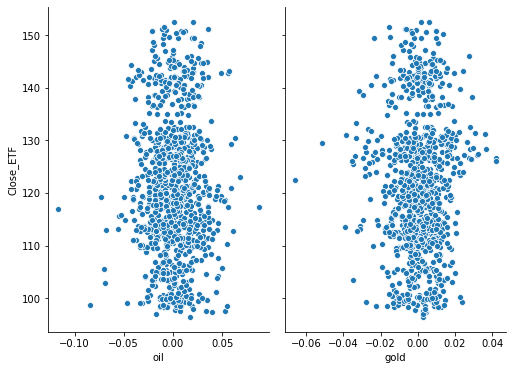

In [250]:
#Part 10: Checking residuals and model selection
# Assumption 1: Check for linearity of the data

p = sns.pairplot(data, x_vars=['oil','gold'], y_vars='Close_ETF', size=5, aspect=0.7)

From the scatterplots, we see that there's no linear relationship between the independent variables (oil, gold and JPM) and the dependent variable (Close_ETF)

checking for Heteroscedasticity:
Lets check for heteroscedasticity. We should have no heteroscedasticity in our model We are goinf to use white test, and Breusch pagan test Our null hypothesis states the varaince for the errors are equal, and the alternative hypothesis states that the varainces are not equal H0:sigmai^2= sigma^2 H1:sigmai^2 not= sigma^2 Our goal is to fail to reject the null hypothesis, have a high P-values becaue that means we have no heteroscedasticity

In [251]:
_,pval, _,f_pval= diag.het_white(estimate.resid, estimate.model.exog)
print(pval,f_pval)
print('-'*100)

_,pval, _,f_pval= diag.het_breuschpagan(estimate.resid, estimate.model.exog)
print(pval,f_pval)
print('-'*100)

0.7400801330196003 0.741396124069488
----------------------------------------------------------------------------------------------------
0.9543929820573316 0.9545245701255584
----------------------------------------------------------------------------------------------------


From the results of the white test, and Breusch pagan test, we fail to reject the null hypothesis. Our P-values are more significant than 0.05. Which means that we have no heteroscedasticity.

Now, we Check for autocorrelation. we are going to use Ljung box test. Our null hypothesis states that our data is random, the alternative hypothesis states that our data is not random H0: data is random H1: data is not random We aim to fail to reject the null hypothesis. If we fail to reject the null hypothesis, that means we have no autocorrelation.

In [252]:
lag=min(10,(len(x)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

test_results= diag.acorr_ljungbox(estimate.resid, lags=lag)

ibvalue,p_val=test_results

if min(p_val)>0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print(" we fail to reject the null hypothesis, so there is no autocorrelation")
    print('_'*100)
else: 
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print(" we reject the null hypothesis,  there is autocorrelation")

The number of lags will be 10
----------------------------------------------------------------------------------------------------
The lowest p-value found was 0.0
 we reject the null hypothesis,  there is autocorrelation


/Users/Sarah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


to check for autocorrelation visually, we will plot

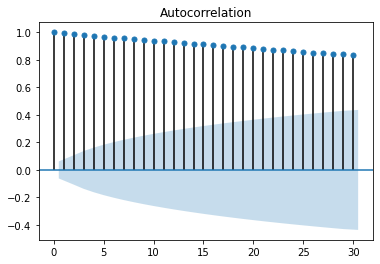

In [253]:
sm.graphics.tsa.plot_acf(estimate.resid)
plt.title('Autocorrelation')
plt.show()

From the test results and the graph we obsrve that we have an autocorrelation in our model; which means that the computed standared error and consequentially p-values are misleading. Auto correlation in the residulas of a model is also a sign that our model maybe unsound.

Check for the normaity of the residuals

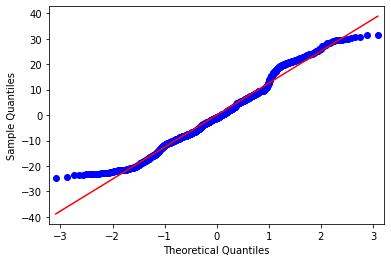

From the graph above, we observe that the data is not normally distributed; it deviates from the red line


In [254]:
sm.qqplot(estimate.resid, line='s')
pylab.show()
print('From the graph above, we observe that the data is not normally distributed; it deviates from the red line')

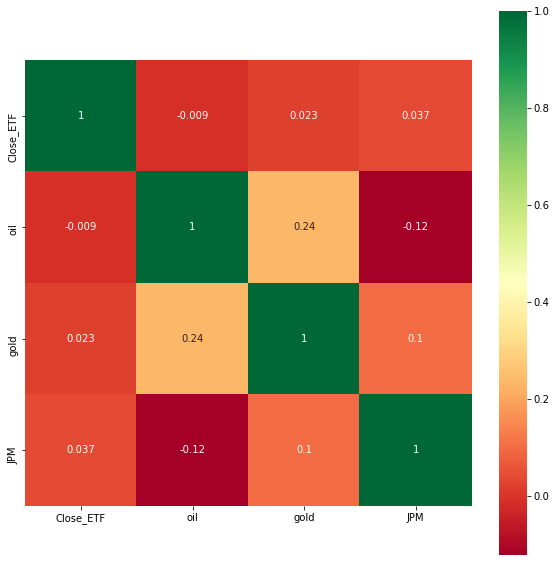

In [255]:
# Assumption 5: Check for independence i.e. there is no multicollinearity between the independent variables

plt.figure(figsize=(10,10))  
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',square=True)

Chek the mean of the residulas is approximelty 0

In [256]:
mean_residuals= sum(estimate.resid)/len(estimate.resid)
mean_residuals 

1.446665010007564e-14

We see that mean of residuals is approx. 0

Measure of Error

In [257]:
model_mse= mean_squared_error(y_test, y_predict)

In [258]:
model_mae=mean_absolute_error(y_test, y_predict)

In [259]:
model_rmse=math.sqrt(model_mse)

In [260]:
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 1.53e+02
MAE 9.84
RMSE 12.4


How to improve our model

In order to improve the normality, the outliers in the data should be taken out. From the boxplot below, we observe that the variable oil and the variable gold contain outliers. Removing them could improve our model


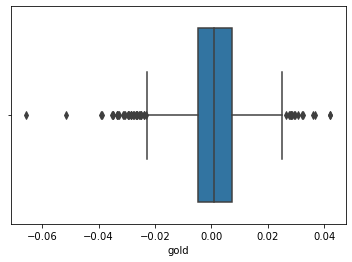

In [261]:
sns.boxplot(gold)



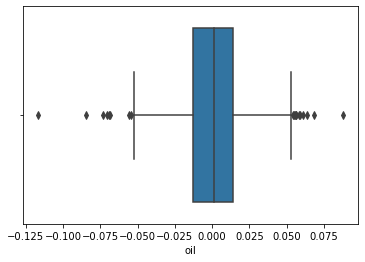

In [262]:
sns.boxplot(oil)



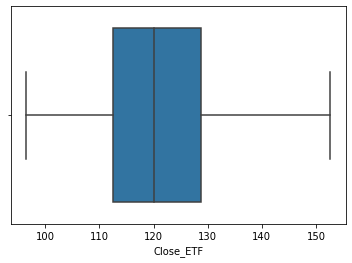

In [263]:
sns.boxplot(ETF)

●	In order to improve the linearity, we should try either adding polynomial terms to some of the predictors or applying nonlinear transformations.

●	Remove the Independent Variables that do not contribute significantly to the model after using a t-test i.e. perform dimensionality reduction.

●	Heteroscedasticity can be solved either by using weighted least squares regression instead of the standard OLS or transforming either the dependent or highly skewed variables. 


In [264]:
#z-score function helps us to identify the outlier at a specific rows and the specific column
#Here we have mentioned the threshold for z score as 3 

#Since we need only the gold and oil column we remove the JPM column from the data dataset

data = data.drop('JPM', axis=1)


z = np.abs(stats.zscore(data))
print(z)

[[1.89461175 1.81252017 0.35493945]
 [1.86277334 0.04378494 0.17985071]
 [1.75054318 1.54366123 0.76212251]
 ...
 [2.39957287 1.66440228 0.60780016]
 [2.50463847 0.02430755 0.45330906]
 [2.49827066 0.91543641 0.1154256 ]]


In [265]:
threshold = 3
print(np.where(z > 3))

(array([ 18,  64,  87, 123, 167, 355, 379, 456, 458, 580, 653, 664, 677,
       727, 728, 744, 748, 751, 764, 766, 826]), array([1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))


In [266]:
print(z[18][1])

4.065305006947643


In [267]:
data.head()

,Close_ETF,oil,gold
0,97.349998,0.039242,0.004668
1,97.750000,0.001953,-0.001366
2,99.160004,-0.031514,-0.007937
3,99.650002,0.034552,0.014621
4,99.260002,0.013619,-0.011419


In [268]:
data_no_outliers = data[(z < 3).all(axis=1)]

In [269]:
data_no_outliers.shape

(979, 3)

In [270]:
data.shape

(1000, 3)

# With the help of the z-score the outliers are removed from the data.Total number of outliers are 32 and they are removed

In [271]:
CLose_ETF = data_no_outliers.Close_ETF

In [272]:
Gold = data_no_outliers.gold

In [273]:
Oil = data_no_outliers.oil

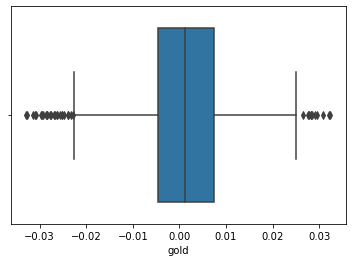

In [274]:
sns.boxplot(Gold)

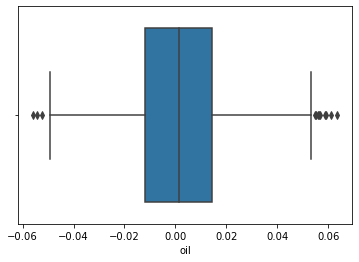

In [275]:
sns.boxplot(Oil)

# From the above plots we can see that the most of the outliers are removed.

In [276]:
data_no_outliers.head()

,Close_ETF,oil,gold
0,97.349998,0.039242,0.004668
1,97.750000,0.001953,-0.001366
2,99.160004,-0.031514,-0.007937
3,99.650002,0.034552,0.014621
4,99.260002,0.013619,-0.011419


In [277]:
#Using the model on the no outlier data

X_no_outliers = data_no_outliers[['oil','gold']] 
Y_no_outliers = data_no_outliers['Close_ETF']


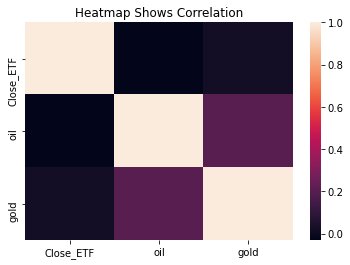

In [278]:
correlation= data_no_outliers.corr()
correlation
heatmaps= sns.heatmap(correlation)
plt.title('Heatmap Shows Correlation')
plt.show()

In [279]:
regression=LinearRegression()
regression.fit(data_no_outliers[['oil','gold']],data_no_outliers.Close_ETF)

LinearRegression()

In [280]:
LinearRegression()

LinearRegression()

In [281]:
regression.intercept_

regression.coef_

array([-22.49625274,  31.61356395])

In [282]:
x=data_no_outliers.drop(['Close_ETF'], axis=1)
y=data_no_outliers[['Close_ETF']]


In [283]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.20, random_state=1)
regression_model=LinearRegression()
regression_model.fit(x_train,y_train)

LinearRegression()

In [284]:
intercept=regression_model.intercept_[0]
intercept

121.16519395113649

In [285]:
coef=regression_model.coef_[0][0]
coef

-17.935102097440634

In [286]:
print("The intercept for our model is {:0.4}".format(intercept))
print('-'*100)
for coef in zip(x.columns,regression_model.coef_[0]):
    print("The coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 121.2
----------------------------------------------------------------------------------------------------
The coefficient for oil is -1.8e+01
The coefficient for gold is 4.6e+01


In [287]:
y_predict=regression_model.predict(x_test)
y_predict

array([[121.64138818],
       [121.12914778],
       [121.60633085],
       [119.68638986],
       [121.08953796],
       [120.96960574],
       [121.24228753],
       [121.5118375 ],
       [120.74175975],
       [121.06462254],
       [121.08472801],
       [121.29346989],
       [122.2931249 ],
       [120.53426958],
       [120.77800126],
       [121.13314648],
       [120.88908801],
       [121.39423881],
       [120.80969542],
       [121.42403169],
       [121.41080637],
       [121.01730217],
       [121.85592548],
       [120.95647229],
       [121.14135401],
       [120.7882269 ],
       [121.11347458],
       [121.81698309],
       [120.95981909],
       [120.5304321 ],
       [121.44630488],
       [122.02056198],
       [121.8729151 ],
       [120.08866611],
       [120.8823569 ],
       [121.71078091],
       [121.41445941],
       [122.21080368],
       [121.19466425],
       [121.01048313],
       [121.09525546],
       [121.38772168],
       [121.72332481],
       [121

In [288]:
model_r2= r2_score(y_test, y_predict)
print('R-squared is', model_r2)

R-squared is -0.0004937624881364844


In [289]:
x2= sm.add_constant(x)

In [290]:
model= sm.OLS(y,x2)

In [291]:
estimate= model.fit()

print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:              Close_ETF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7501
Date:                Mon, 07 Dec 2020   Prob (F-statistic):              0.473
Time:                        06:09:23   Log-Likelihood:                -3869.9
No. Observations:                 979   AIC:                             7746.
Df Residuals:                     976   BIC:                             7760.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.1834      0.406    298.765      0.0

# Discuss how you may improve the quality of your regression model according to the strategy of model selection?


### The Quality of the regression model can be improved with one model selection technique known as the Backward Elimination

# Backward Elimination

In [293]:
#Backward Elimination Technique
#Steps for Backward Elimination
#1.Take the Significance value as 0.05 and compare the significance value with the p for each column after fitting the model
#2.Eliminate the column which is greater than the significance value and repeat step 1

data= pd.read_excel('data.xlsx')

x=data.drop(['Close_ETF'], axis=1)
y=data[['Close_ETF']]

x = np.append(arr = np.ones((1000,1)).astype(int),values = x,axis = 1)


In [294]:
x_opt = x[:,[0,1,2,3]]

In [295]:
regressor_OLS = sm.OLS(endog = y,exog = x_opt).fit()

In [296]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Close_ETF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6079
Date:                Mon, 07 Dec 2020   Prob (F-statistic):              0.610
Time:                        06:10:06   Log-Likelihood:                -3948.8
No. Observations:                1000   AIC:                             7906.
Df Residuals:                     996   BIC:                             7925.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.1228      0.399    303.464      0.000     120.340     121.906
x1            -6.0852     19.632     -0.310      0.757     -44.611      32.440
x2            24.5625     36.597      0.671      0.502     -47.254      96.379
x3            38.0672     36.715      1.037      0.300     -33.981     110.115
==============================================================================
Omnibus:                       26.486   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.807
Skew:                           0.303   Prob(JB):                     1.12e-05
Kurtosis:                       2.577   Cond. No.                         99.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## From the above summary we see that the highest P value is at x1 with 0.757 which is greater than 0.05. So we will go ahead and remove the value and again fit the model

In [297]:
x_opt = x[:,[0,2,3]]
regressor_OLS = sm.OLS(endog = y,exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Close_ETF   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8646
Date:                Mon, 07 Dec 2020   Prob (F-statistic):              0.422
Time:                        06:10:07   Log-Likelihood:                -3948.9
No. Observations:                1000   AIC:                             7904.
Df Residuals:                     997   BIC:                             7918.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.1175      0.399    303.865      0.000     120.335     121.900
x1            21.7171     35.411      0.613      0.540     -47.771      91.205
x2            39.7673     36.287      1.096      0.273     -31.440     110.974
==============================================================================
Omnibus:                       26.601   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.838
Skew:                           0.303   Prob(JB):                     1.10e-05
Kurtosis:                       2.575   Cond. No.                         94.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## From the above summary we see that the highest P value is at x1 with 0.540 which is greater than 0.05. So we will go ahead and remove the value and again fit the model

In [298]:
x_opt = x[:,[0,3]]
regressor_OLS = sm.OLS(endog = y,exog = x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Close_ETF   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.354
Date:                Mon, 07 Dec 2020   Prob (F-statistic):              0.245
Time:                        06:10:08   Log-Likelihood:                -3949.1
No. Observations:                1000   AIC:                             7902.
Df Residuals:                     998   BIC:                             7912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        121.1307      0.398    304.439      0.000     120.350     121.911
x1            41.9965     36.093      1.164      0.245     -28.830     112.823
==============================================================================
Omnibus:                       26.875   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.979
Skew:                           0.303   Prob(JB):                     1.02e-05
Kurtosis:                       2.571   Cond. No.                         90.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## From the above summary we see that the highest P value is at x1 with 0.245 which is greater than 0.05. So we will also remove x1.

# From the above procedure we find that there are no significant variables in the dataset